# Capstone Webscrapping using BeautifulSoup


## Latar Belakang

Pada Capstone ini kita akan scraping data menggunakan BautifulSoup, web yang akan diambil datanya adalah/dari https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel, dimana pada web  tersebut terdapat Ethereum USD (Historical Data). data yang akan di scrap sejak Januari 2020 - Juli 2021 

## Requesting the Data and Creating a BeautifulSoup

Kita akan mengambil datanya menggunakan metode `get`

In [2]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

Untuk memvisualisasikan apa yang sebenarnya Anda dapatkan dari `request.get`, kita dapat menggunakan .content jadi apa yang sebenarnya kita dapatkan, di sini kita  meringkasnya sehingga tidak membuat layar kita penuh dengan html yang kita dapatkan dari halaman. kita dapat menghapus irisan jika Anda ingin melihat apa yang kami dapatkan sepenuhnya.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n<link rel="preload" href="h'

Seperti yang kita lihat, kita mendapatkan html yang sangat tidak terstruktur dan kompleks, yang sebenarnya berisi kode yang diperlukan untuk menampilkan halaman web di browser web. Tapi kita sebagai data analis/pengguna python masih bingung apa dan di mana kita bisa menggunakan potongan kode itu, jadi di sini kita menggunakan BeautifulSoup. Class soup yang indah akan menghasilkan BeautifulSoup. Beautiful Soup mengubah dokumen HTML kompleks menjadi pohon kompleks objek Python.

ok kita implementasikan BeautifulSoup

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Baik kita lihat struktur data yang akan kita scrap 
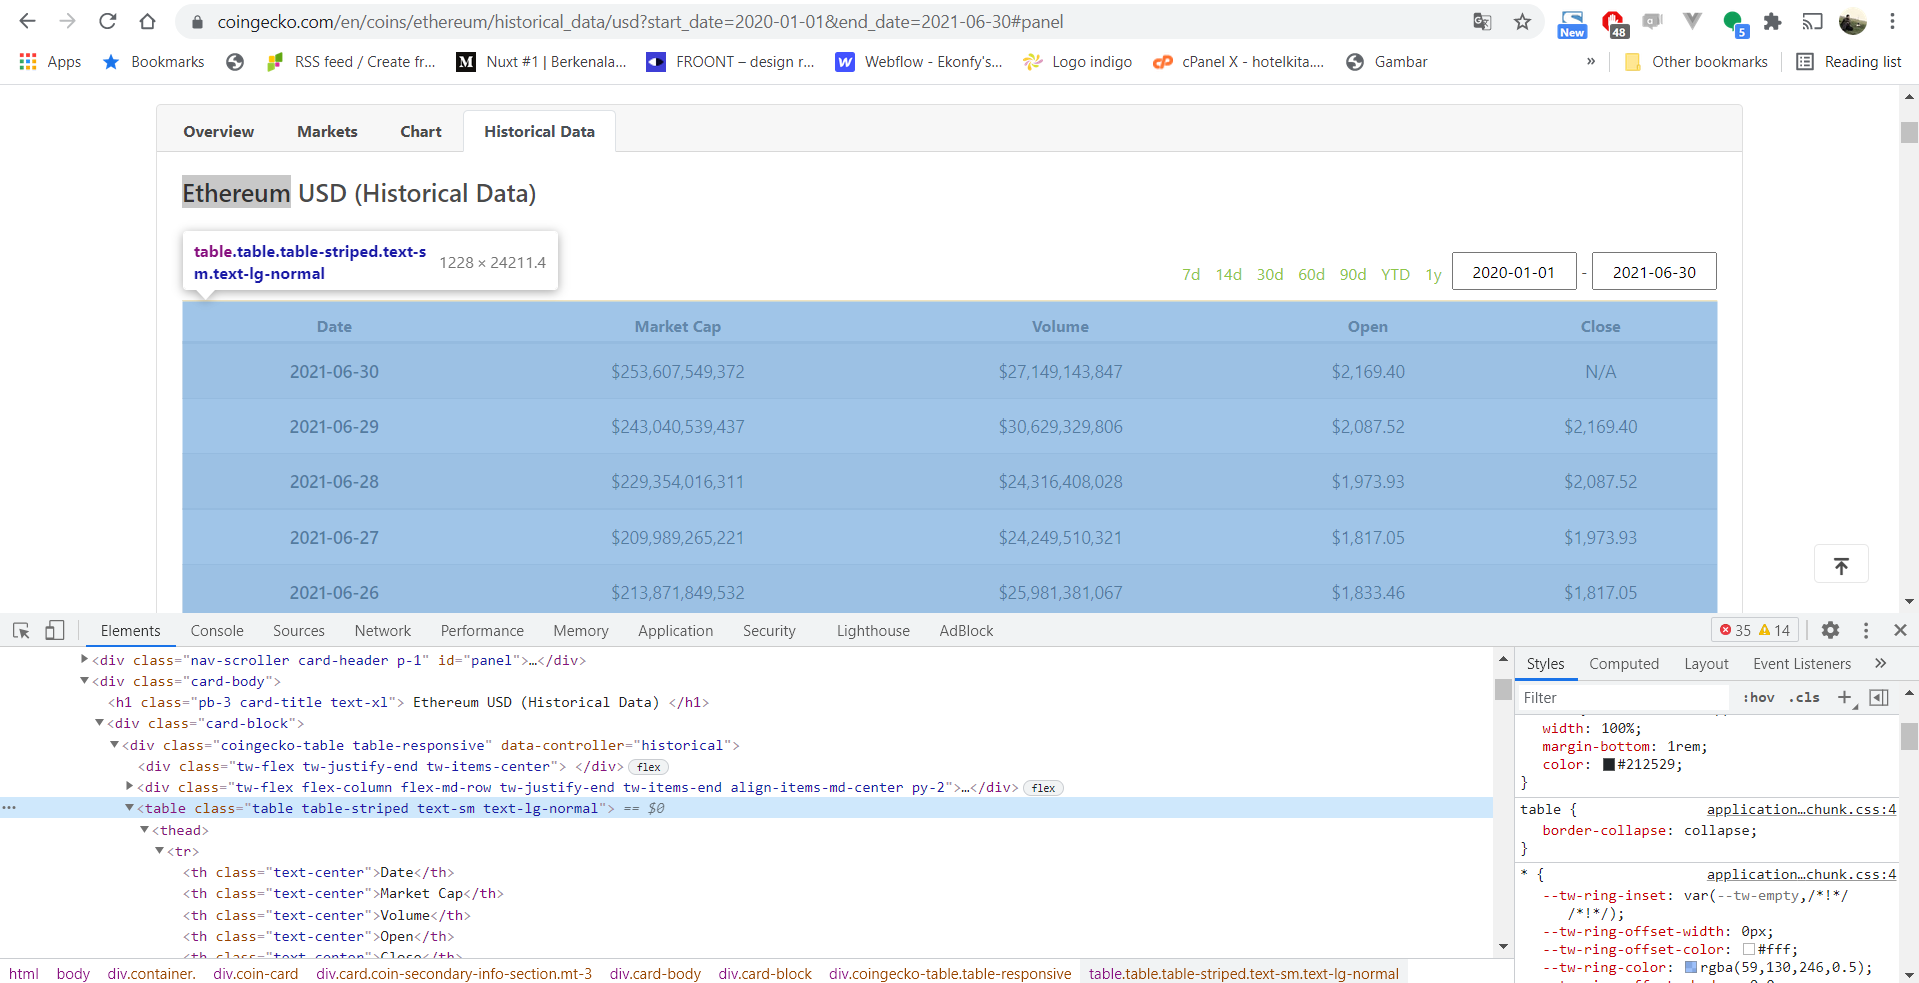

lanjut kita akan mulai scrap data dan mengextrak data tersebut mengunakan perintah `find()`

In [5]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


Kita cek ada berapa row data yang akan kita ambil

In [16]:
row = table.find_all('tr')
row_length = len(row)
row_length

548

Ok setelah kita cek banyaknya row data adalah 548 row 

kita akan ambil datanya, dengan metode lopping agar semua data dapat kita ambil 

In [7]:
temp = [] #initiating a tuple

for i in range(1, row_length):
    
    #get date 
    Date = row[i].find_all('th', attrs ={'class':'font-semibold text-center'})[0].text
    Date = Date.strip()
       
    #get volume
    Volume = row[i].find_all('td', attrs ={'class':'text-center'})[1].text
    Volume= Volume.strip()
    
    
    #scrapping process
    temp.append((Date, Volume))
temp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

setelah data kita ambil, kita urutkan data dari awal sampai terbaru menggunakan `[::-1]`

In [8]:
temp = temp[::-1]
temp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', '$9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020-

## Creating data frame & Data wrangling

Setelah data kita ambil, data tersebut kita masukan/buat menjadi data frame 

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Volume'))
df.head()

,Date,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


In [10]:
df.dtypes

Date      object
Volume    object
dtype: object

Setelah kita masukan sebagai data frame, kita cek data tersebut dan ada beberapa data yang tidak sesuai dan perlu disesuaikan.
disini kita akan menghilangkan tanda "," dan "$" menjadi ""(kosong) 
kita juga akan merubah tipe data `Date` menjadi Date dan `Volume` menjadi Float

In [11]:
df['Volume'] = df['Volume'].str.replace(",","")
df['Volume'] = df['Volume'].str.replace("$","")

df['Date'] = df['Date'].astype('datetime64')
df['Volume'] = df['Volume'].astype('float64')

<ipython-input-11-c6b4b7ea61df>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace("$","")


Setelah tipe data diperbaiki kita akan merubah date menjadi index 

In [12]:
df = df.set_index('Date')
df

,Volume
Date,
2020-01-01,7.103187e+09
2020-01-02,6.623732e+09
2020-01-03,6.497298e+09
2020-01-04,9.655245e+09
2020-01-05,6.958394e+09
...,...
2021-06-26,2.598138e+10
2021-06-27,2.424951e+10
2021-06-28,2.431641e+10


setelah selesia data wrangling, kita akan masukan data tersebut menjadi Data visualisation 

<AxesSubplot:xlabel='Date'>

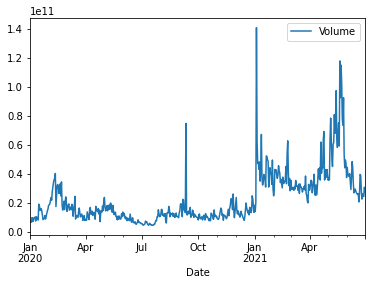

In [13]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Kita implentasikan hasil webscraping ke flask dengan file  `app.py`

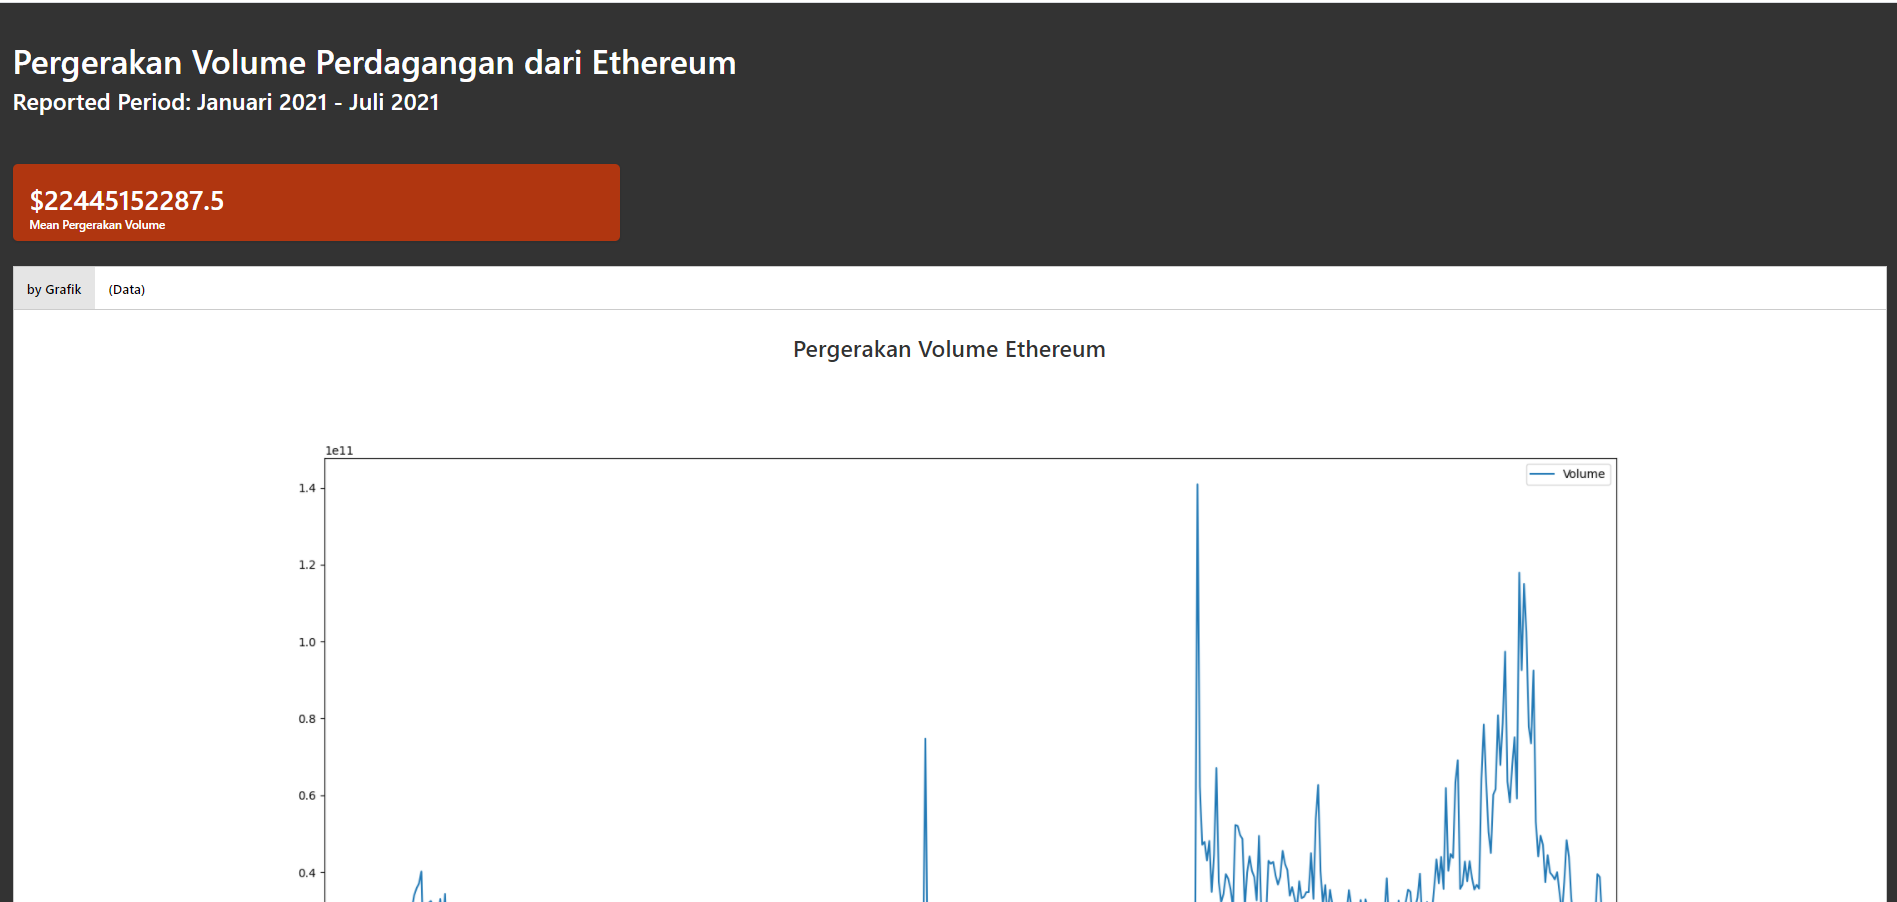

## Finishing This Notebook with Your Analysis and Conclusion

<AxesSubplot:xlabel='Date'>

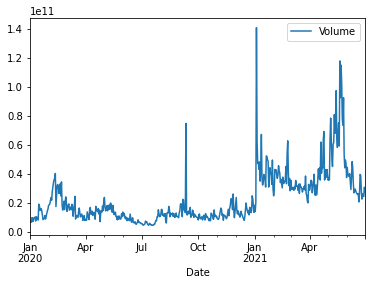

In [15]:
df.plot()

Dapat dianalisa bahwa : 
- pergerakan volume Ethereum meningkat sejak Jan 2020 - Juli 2021
- Terjadi peningkatan terbesar pada periode Mei - awal Juni 2021
- Ethereum pada akhir Juni mengalami penurunan yang cukup tajam 

Kesimpulan : 

Dapat kita simpulkan bahwa Kripto currency di awal kemunculan, terutama Ethereum mengalami kenaikan yang signifikan maupun untuk pergerakan volume tersebut tidak stabil. dan bila akan investasi ke kripto currency dapat dipertimbangkan apakah kita beli pada fase yang tidak menguntungkan contoh beli mahal di bulan Mei 2021 ternyata harga turun 1 bulan kemudian. 